In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
!wget https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Donn%C3%A9es%20Wikip%C3%A9dia/Jeu%20de%20donn%C3%A9es%20final/donnees_wiki_total.csv -nv
data_origine = pd.read_csv("donnees_wiki_total.csv",sep=",", encoding='cp1252')

2021-12-13 15:29:09 URL:https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Donn%C3%A9es%20Wikip%C3%A9dia/Jeu%20de%20donn%C3%A9es%20final/donnees_wiki_total.csv [6545717/6545717] -> "donnees_wiki_total.csv.6" [1]


In [3]:
data_non_ts=data_origine.loc[data_origine['suicide']==False,:]
data_ts=data_origine.loc[data_origine['suicide']==True,:]

In [4]:
data=data_origine
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      2974 non-null   object
 1   V1           2974 non-null   int64 
 2   pages_links  2974 non-null   object
 3   pages_names  2974 non-null   object
 4   subcategory  2974 non-null   object
 5   suicide      2974 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 119.2+ KB


,content,V1,pages_links,pages_names,subcategory,suicide
0,Warren’s parents were Eliza Ann Brown (1824-1...,52,https://en.wikipedia.org//wiki/Harry_Marsh_Warren,Harry_Marsh_Warren,suicide,True
1,"After her ALS diagnosis , Rodriquez reque...",103,https://en.wikipedia.org//wiki/Sue_Rodriguez,Sue_Rodriguez,Assisted_suicide,True
2,Ames was born Mercedes Grabowski in Antigonis...,116,https://en.wikipedia.org//wiki/August_Ames,August_Ames,Bullying_and_suicide,True
3,"Chen was born and raised in Chinatown , Manh...",119,https://en.wikipedia.org//wiki/Suicide_of_Dann...,Suicide_of_Danny_Chen,Bullying_and_suicide,True
4,"Halligan was born on December 18 , 1989 , He...",125,https://en.wikipedia.org//wiki/Suicide_of_Ryan...,Suicide_of_Ryan_Halligan,Bullying_and_suicide,True


False    2105
True      869
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


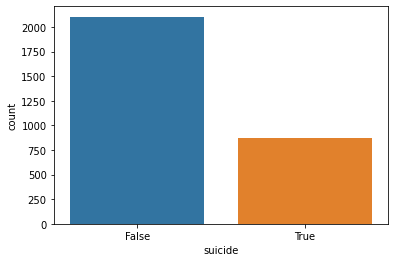

In [5]:
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 1519 to 868
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   content      1738 non-null   object
 1   V1           1738 non-null   int64 
 2   pages_links  1738 non-null   object
 3   pages_names  1738 non-null   object
 4   subcategory  1738 non-null   object
 5   suicide      1738 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 83.2+ KB
True     869
False    869
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


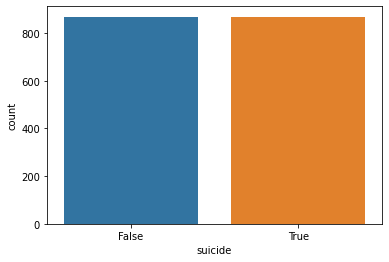

In [6]:
data_non_ts_reduit=data_non_ts.sample(869)
data=[]
data=pd.concat([data_non_ts_reduit, data_ts])
data.info()
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

In [7]:
#Ici, nous cherchons à binariser la variable suicide
#data["suicide"] = data["suicide"].replace({True: 0, False: 1})

In [8]:
#change content en unicode
documents= data['content'].values.astype("U")
#On vectorise
vectorizer= TfidfVectorizer(stop_words='english')
features =vectorizer.fit_transform(documents)


In [9]:
X = features
y = data["suicide"]

# **TRAIN TEST CLASSIFICATION**




In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4)

In [11]:
# On instancie le modèle
model=KMeans(2)
#On entraine le modèle sur le jeu d'entrainement
model.fit(X_train)

KMeans(n_clusters=2)

In [12]:
Y_pred=model.predict(X_test)
df_confusion = pd.crosstab(y_test,Y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted    0    1  All
Actual                  
False      179  188  367
True       312   17  329
All        491  205  696


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(('\nClasification report:\n'), classification_report(y_test, Y_pred))
print(('\nConfussion matrix:\n'),confusion_matrix(y_test, Y_pred))


Clasification report:
               precision    recall  f1-score   support

       False       0.36      0.49      0.42       367
        True       0.08      0.05      0.06       329

    accuracy                           0.28       696
   macro avg       0.22      0.27      0.24       696
weighted avg       0.23      0.28      0.25       696


Confussion matrix:
 [[179 188]
 [312  17]]


# **CROSS VALIDATION**

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold


In [15]:
y_pred = cross_val_predict(model, X, y, cv=5)
print("Binary classification-----")
cm = confusion_matrix(y, y_pred)
recall = np.diag(cm) / np.sum(cm, axis=1)
precision = np.diag(cm) / np.sum(cm, axis=0)

print("confusion matrice\n" , cm)
        
print(classification_report(y, y_pred))

Binary classification-----
confusion matrice
 [[455 414]
 [368 501]]
              precision    recall  f1-score   support

       False       0.55      0.52      0.54       869
        True       0.55      0.58      0.56       869

    accuracy                           0.55      1738
   macro avg       0.55      0.55      0.55      1738
weighted avg       0.55      0.55      0.55      1738



In [16]:
cross_val_score(model, X, y, cv=5, scoring='accuracy')

array([0.41091954, 0.52586207, 0.29885057, 0.03746398, 0.0259366 ])